In [120]:
# import packages and functions for data analysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics, svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


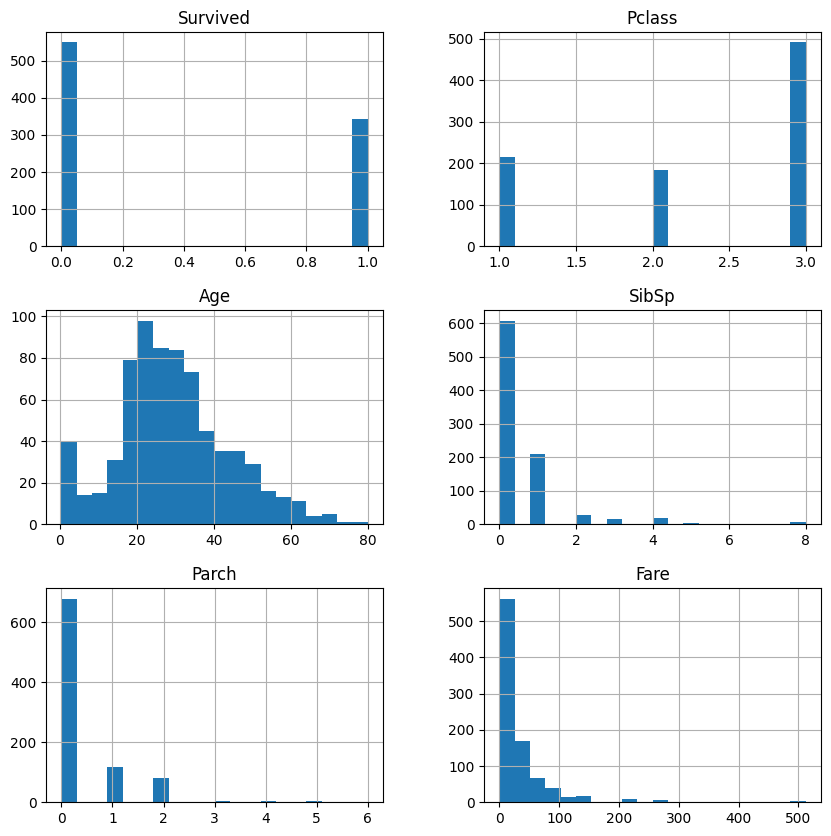

In [96]:
# load training and testing data
titanic_data = pd.read_csv('train.csv')

titanic_data.info()
titanic_data.tail()
titanic_data.iloc[:,1:].hist(bins=20, figsize=(10,10))
plt.savefig("titanic_plots/overall_hist.png")

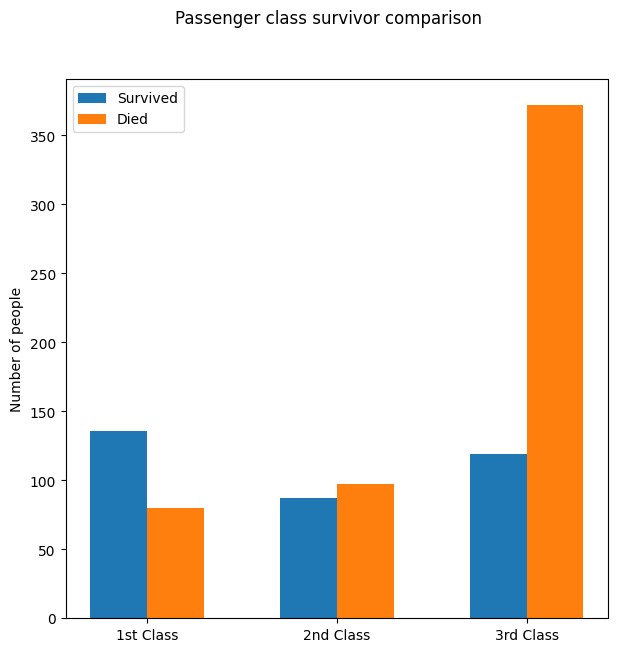

In [47]:
# bar chart showing survived vs passenger class in training data

# find data on who died and survived per passenger class
titanic_data = pd.read_csv('train.csv')
titanic_data.insert(2, 'Count', np.ones(titanic_data.shape[0], dtype=int))
groupby_class = titanic_data.groupby(['Pclass']).sum(numeric_only=True)
class_survived = groupby_class['Survived']
class_died = groupby_class['Count'] - groupby_class['Survived']

# create grouped bar chart
fig, ax = plt.subplots(figsize=(7,7))
width = 0.3
x = np.arange(len(class_died))
survived_bars = ax.bar(x - width/2, class_survived, width, label = "Survived")
died_bars = ax.bar(x + width/2, class_died, width, label = "Died")

# aethestics
ax.set_ylabel("Number of people")
ax.set_xticks(range(len(class_died)))
ax.set_xticklabels(["1st Class", "2nd Class", "3rd Class"])
ax.legend()
fig.suptitle("Passenger class survivor comparison")
plt.savefig("titanic_plots/survived_by_class.png")

        PassengerId  Survived  Count  Pclass       Age  SibSp  Parch  \
Sex                                                                    
female       135343       233    314     678   7286.00    218    204   
male         262043       109    577    1379  13919.17    248    136   

              Fare  
Sex                 
female  13966.6628  
male    14727.2865  


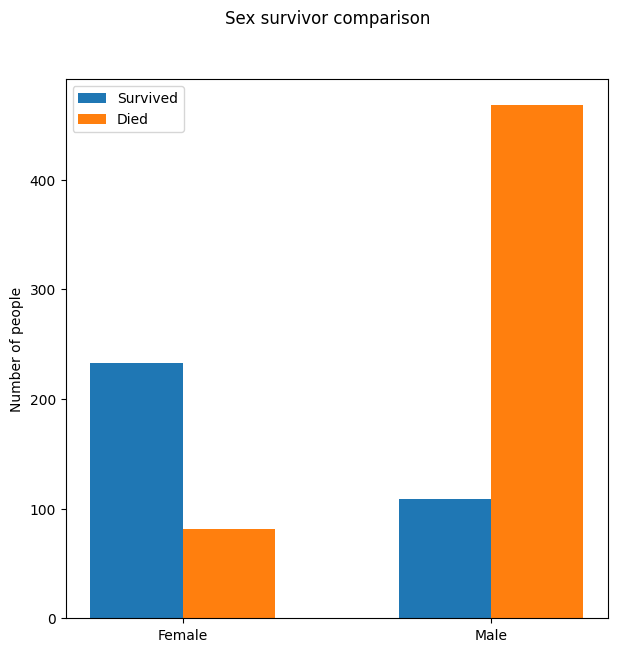

In [53]:
# bar chart showing survived vs sex in training data

# find data on who died and survived per sex
titanic_data = pd.read_csv('train.csv')
titanic_data.insert(2, 'Count', np.ones(titanic_data.shape[0], dtype=int))
groupby_sex = titanic_data.groupby(['Sex']).sum(numeric_only=True)
print(groupby_sex)
sex_survived = groupby_sex['Survived']
sex_died = groupby_sex['Count'] - groupby_sex['Survived']

# create grouped bar chart
fig, ax = plt.subplots(figsize=(7,7))
width = 0.3
x = np.arange(len(sex_died))
survived_bars = ax.bar(x - width/2, sex_survived, width, label = "Survived")
died_bars = ax.bar(x + width/2, sex_died, width, label = "Died")

# aethestics
ax.set_ylabel("Number of people")
ax.set_xticks(range(len(sex_died)))
ax.set_xticklabels(["Female", "Male"])
ax.legend()
fig.suptitle("Sex survivor comparison")
plt.savefig("titanic_plots/survived_by_sex.png")

          PassengerId  Survived  Count  Pclass       Age  SibSp  Parch  \
Embarked                                                                 
C               74820        93    168     317   4005.92     65     61   
Q               32178        30     77     224    786.50     33     13   
S              289496       217    644    1514  16312.75    368    266   

                Fare  
Embarked              
C         10072.2962  
Q          1022.2543  
S         17439.3988  


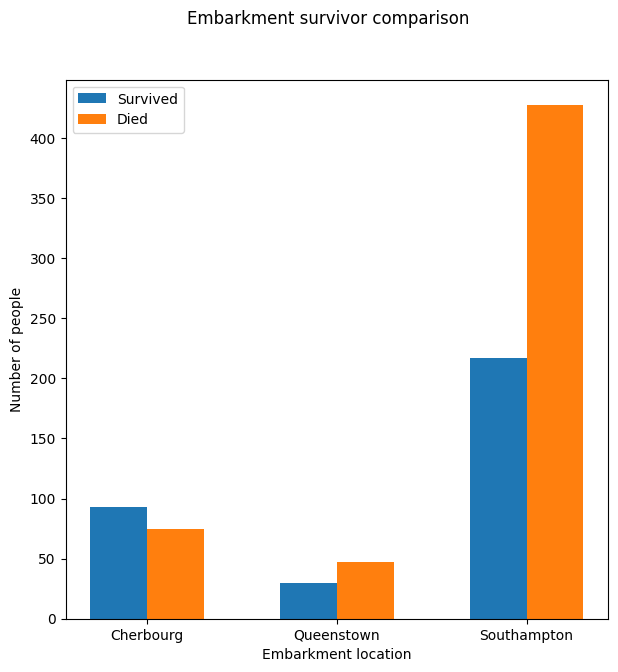

In [89]:
# bar chart showing survived vs embarkment place in training data

# find data on who died and survived per embarkment place
titanic_data = pd.read_csv('train.csv')
titanic_data.insert(2, 'Count', np.ones(titanic_data.shape[0], dtype=int))
groupby_embarked = titanic_data.groupby(['Embarked']).sum(numeric_only=True)
print(groupby_embarked)
embarked_survived = groupby_embarked['Survived']
embarked_died = groupby_embarked['Count'] - groupby_embarked['Survived']

# create grouped bar chart
fig, ax = plt.subplots(figsize=(7,7))
width = 0.3
x = np.arange(len(embarked_died))
survived_bars = ax.bar(x - width/2, embarked_survived, width, label = "Survived")
died_bars = ax.bar(x + width/2, embarked_died, width, label = "Died")

# aethestics
ax.set_ylabel("Number of people")
ax.set_xlabel("Embarkment location")
ax.set_xticks(range(len(embarked_died)))
ax.set_xticklabels(["Cherbourg", "Queenstown", "Southampton"])
ax.legend()
fig.suptitle("Embarkment survivor comparison")
plt.savefig("titanic_plots/survived_by_embark.png")

                 PassengerId  Survived  Count      Age  SibSp  Parch  \
Embarked Pclass                                                        
C        1             37468        59     85  2814.00     32     27   
         2              7554         9     17   341.50     10      9   
         3             29798        25     66   850.42     23     25   
Q        1               659         1      2    77.00      3      0   
         2              1254         2      3    87.00      0      0   
         3             30265        27     72   622.50     30     13   
S        1             60686        74    127  4120.42     55     50   
         2             73248        76    164  4740.33     64     61   
         3            155562        67    353  7452.00    249    155   

                      Fare  
Embarked Pclass             
C        1       8901.0750  
         2        431.0917  
         3        740.1295  
Q        1        180.0000  
         2         37.0500  
    

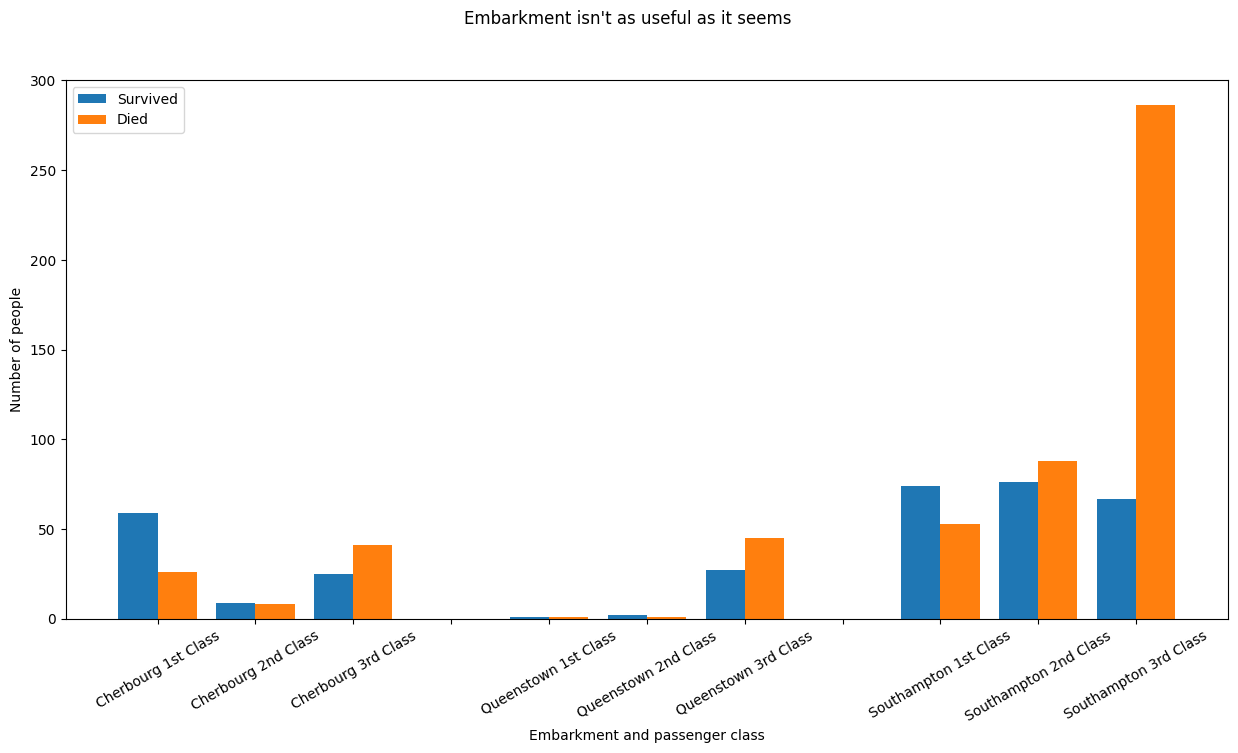

In [98]:
# bar chart showing survived vs embarkment place and passenger class in training data

# find data on who died and survived per passenger class and embarkment
titanic_data = pd.read_csv('train.csv')
titanic_data.insert(2, 'Count', np.ones(titanic_data.shape[0], dtype=int))
groupby_embarked = titanic_data.groupby(['Embarked', 'Pclass']).sum(numeric_only=True)
print(groupby_embarked)
embarked_survived = groupby_embarked['Survived']
embarked_died = groupby_embarked['Count'] - groupby_embarked['Survived']

# create grouped bar chart
fig, ax = plt.subplots(figsize=(15,7))
width = 0.4
x = np.arange(len(embarked_died))
x = np.array([0,1,2,4,5,6,8,9,10])
survived_bars = ax.bar(x - width/2, embarked_survived, width, label = "Survived")
died_bars = ax.bar(x + width/2, embarked_died, width, label = "Died")

# aethestics
ax.set_ylabel("Number of people")
ax.set_xlabel("Embarkment and passenger class")
ax.set_xticks(range(11))
ax.set_xticklabels(["Cherbourg 1st Class", "Cherbourg 2nd Class", "Cherbourg 3rd Class", "", "Queenstown 1st Class", "Queenstown 2nd Class", "Queenstown 3rd Class", "", "Southampton 1st Class", "Southampton 2nd Class", "Southampton 3rd Class"], rotation=30)
ax.legend()
fig.suptitle("Embarkment isn't as useful as it seems")
plt.savefig("titanic_plots/survived_by_embarkment_and_class.png")

C:\Users\aferg\AppData\Local\Temp\ipykernel_26352\1945620577.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_age = titanic_data.groupby(['Age_bins']).sum(numeric_only=True)


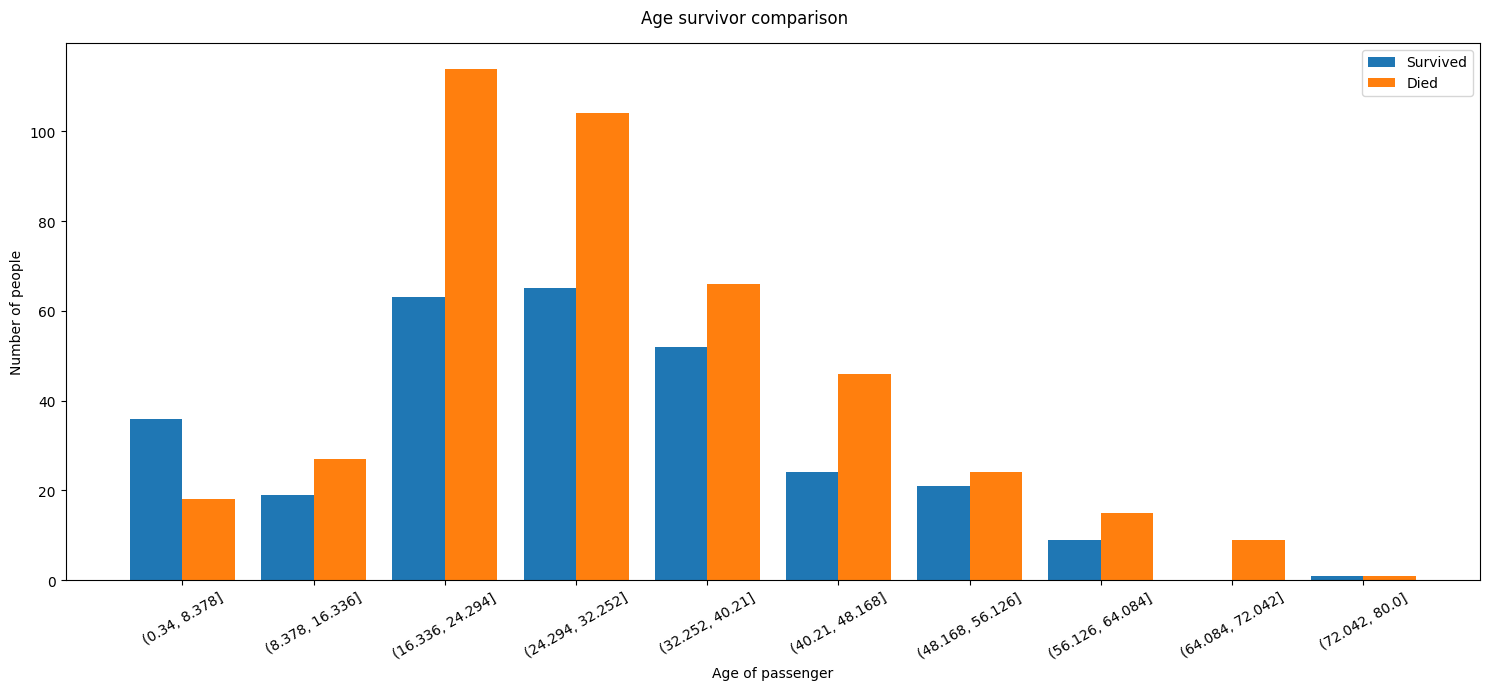

In [97]:
titanic_data = pd.read_csv('train.csv')
titanic_data['Age_bins'] = pd.cut(titanic_data['Age'], 10)
titanic_data.insert(2, 'Count', np.ones(titanic_data.shape[0], dtype=int))
groupby_age = titanic_data.groupby(['Age_bins']).sum(numeric_only=True)
age_survived = groupby_age['Survived']
age_died = groupby_age['Count'] - groupby_age['Survived']

# create grouped bar chart
fig, ax = plt.subplots(figsize=(15,7))
width = 0.4
x = np.arange(len(age_died))
survived_bars = ax.bar(x - width/2, age_survived, width, label = "Survived")
died_bars = ax.bar(x + width/2, age_died, width, label = "Died")

# aethestics
ax.set_ylabel("Number of people")
ax.set_xlabel("Age of passenger")
ax.set_xticks(range(len(age_died)))
ax.set_xticklabels(age_died.index, rotation=30)
ax.legend()
fig.suptitle("Age survivor comparison")
fig.tight_layout()
plt.savefig("titanic_plots/survived_by_age.png")

In [126]:
# data cleaning - preparing the data for training and testing

titanic_data = pd.read_csv('train.csv')

# changing male/female to 0/1
for i in range(titanic_data.shape[0]):
    if titanic_data.loc[i,'Sex'] == 'male': 
        titanic_data.loc[i,'Sex'] = 0
    else:
        titanic_data.loc[i,'Sex'] = 1

data_to_use = titanic_data.iloc[:,[2,4,5,6,7,9]]
data_to_target = titanic_data.iloc[:,1]

# splitting data between 80% training, 20% test
x_train, x_test, y_train, y_test = train_test_split(data_to_use, data_to_target, test_size=0.2, random_state=123) 

# feature scaling using min max scalar
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# create statistics dataframe to store accuracy and runtime etc.
acc_db = pd.DataFrame(columns=['Accuracy', 'Run Time (s)'])
